In [1]:
# Py3_Demo_Jupyter_Scikit-Learn简单线性回归(SimpleLinearRegression)用例_2023-07-29.ipynb
# Create By GF 2023-07-29 00:42

In [2]:
# 导入 Numpy 库 : 用于计算方差、协方差。
import numpy as np

# 导入 Matplotlib 库 : 用于图形化呈现。
import matplotlib.pyplot as plt

# 导入一元线性回归函数 : y = α + βx。
from sklearn.linear_model import LinearRegression

In [3]:
plt.rcParams["font.sans-serif"]=["SimHei"] # -> 设置字体，解决图像中中文乱码问题。
plt.rcParams["axes.unicode_minus"]=False # -> 关闭负号默认解码，解决图像中的“-”负号的乱码问题。

In [4]:
# 预测披萨的价格，数据如下：

Table = """
+---------+-----------+-----------+
|训练样本 |直径(英寸) |价格(美元) |
+---------+-----------+-----------+
|1        |6          |7          |
|2        |8          |9          |
|3        |10         |13         |
|4        |14         |17.5       |
|5        |18         |18         |
+---------+-----------+-----------+
"""

In [5]:
# 训练集数据。

x = [[6], [8], [10], [14], [18]]

y = [[7], [9], [13], [17.5], [18]]

In [6]:
# 将一元线性回归模型定义到 model 变量中。

model = LinearRegression()

In [7]:
# 将训练集数据放入模型中。

model.fit(x, y)

LinearRegression()

In [8]:
# 当披萨的直径为 12 英寸时，预测披萨的价格。

print("披萨的直径 (X) 为 12 时，披萨的价格 (y) 为 : %.2f 美元" % model.predict([[12]])) # -> model.predict() 中的参数应为 2D 数组。

披萨的直径 (X) 为 12 时，披萨的价格 (y) 为 : 13.68 美元


In [9]:
# 定义一组 x2 数据，并预测一组 y2 数据。

x2 = [[0],[10],[14],[25]]

y2 = model.predict(x2)

print(y2)

[[ 1.96551724]
 [11.72844828]
 [15.63362069]
 [26.37284483]]


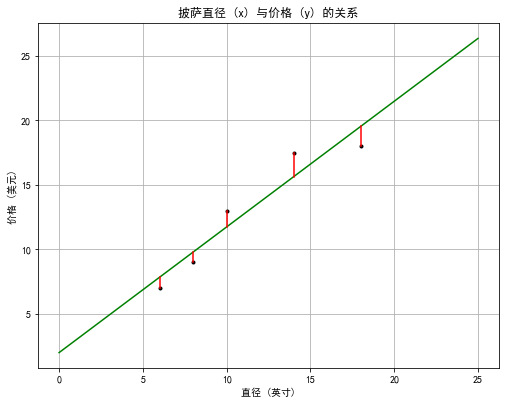

In [10]:
# 1. 定义数据。

# 1.1 复制上面训练集的数据。

x1 = [[6], [8], [10], [14], [18]]

y1 = [[7], [9], [13], [17.5], [18]]

# 1.2 复制上面定义的一组 x2 的数据和预测的一组 y2 的数据。

x2 = [[0],[10],[14],[25]]

y2 = model.predict(x2)

# 2. 绘制图像。

# 2.1 定义画板、绘图轴区域、标题、标签。

fig = plt.figure(figsize=(8, 6), dpi=72)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.set_title("披萨直径 (x) 与价格 (y) 的关系")
ax.set_xlabel("直径 (英寸)")
ax.set_ylabel("价格 (美元)")
ax.grid(True)

# 2.2 绘制实际数据。

ax.plot(x1, y1, 'k.')

# 2.3 根据输入的 x2 的值和预测的 y2 的值绘制一条直线。

ax.plot(x2, y2, 'g-')

# 3. 残差预测值。

# 3.1 根据 x1 求出 y1 的预测值，以便于和实际值做对比。
y1p = model.predict(x1)

# 3.2 for 循环方法用红线标示出预测值与实际值之间的差值。
for x, r, p in zip(x1, y1, y1p):
    ax.plot([x, x], [r, p], "r-")

# 3.3 enumerate 方法用红线标示出预测值与实际值之间的差值。
#y1p = model.predict(x1)
#for i, x in enumerate(x1):
#    ax.plot([x, x], [y1[i], y1p[i]], 'r-')

 
# 显示上一个画布。
plt.show()
# 关闭上一个画布。
plt.close(fig)

In [11]:
# 解一元线性方程 (最小二乘法 )。

# LinearRegression 类的 fit() 方法学习下面的一元线性回归模型 : y = α + βx
# β = cov(x, y) / var(x) : (协方差 / 方差) : α = y¯ − βx¯

# numpy.var() 方法 ：计算一组数据的方差。
var = np.var([6, 8, 10, 14, 18], ddof=1) # -> 计算中使用的除数为 N - ddof，ddof 默认为 0。

print("[ 方差 ] : %.2f" % var)

cov = np.cov([6, 8, 10, 14, 18], [7, 9, 13, 17.5, 18])[0][1]

print("[ 协方差 ] : %.2f" % cov)

b = cov / var

a = np.mean(y) - b * np.mean(x)

print ("[ 一元线性方程 ] : y = %.2f x - %.2f" % (a, b))

[ 方差 ] : 23.20
[ 协方差 ] : 22.65
[ 一元线性方程 ] : y = -4.67 x - 0.98


In [12]:
# 评估这个模型的预测准确度。

# 模型评估 : R方 也叫确定系数，表示模型对现实数据的拟合程度。一定是介于 0 - 1 之间的数。

# 引入测试集。

x_test = [[8], [9], [11], [16], [12]]

y_test = [[11], [8.5], [15], [18], [11]]

R2 = model.score(x_test, y_test)

print ("[ R方 ] : %.2f" % R2)

[ R方 ] : 0.66


In [13]:
# EOF